In [1]:
# importing all the required libraries
import pandas as pd
import numpy as np
import math
from sklearn import linear_model

import seaborn as sns 
import matplotlib.pyplot as plt
%matplotlib inline
import matplotlib

In [2]:
# importing csv file
df=pd.read_csv("marketing_customer_analysis.csv")
df

,Customer,State,Customer Lifetime Value,Response,Coverage,Education,Effective To Date,EmploymentStatus,Gender,Income,...,Months Since Policy Inception,Number of Open Complaints,Number of Policies,Policy Type,Policy,Renew Offer Type,Sales Channel,Total Claim Amount,Vehicle Class,Vehicle Size
0,BU79786,Washington,2763.519279,No,Basic,Bachelor,2/24/11,Employed,F,56274,...,5,0,1,Corporate Auto,Corporate L3,Offer1,Agent,384.811147,Two-Door Car,Medsize
1,QZ44356,Arizona,6979.535903,No,Extended,Bachelor,1/31/11,Unemployed,F,0,...,42,0,8,Personal Auto,Personal L3,Offer3,Agent,1131.464935,Four-Door Car,Medsize
2,AI49188,Nevada,12887.431650,No,Premium,Bachelor,2/19/11,Employed,F,48767,...,38,0,2,Personal Auto,Personal L3,Offer1,Agent,566.472247,Two-Door Car,Medsize
3,WW63253,California,7645.861827,No,Basic,Bachelor,1/20/11,Unemployed,M,0,...,65,0,7,Corporate Auto,Corporate L2,Offer1,Call Center,529.881344,SUV,Medsize
4,HB64268,Washington,2813.692575,No,Basic,Bachelor,2/3/11,Employed,M,43836,...,44,0,1,Personal Auto,Personal L1,Offer1,Agent,138.130879,Four-Door Car,Medsize
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9129,LA72316,California,23405.987980,No,Basic,Bachelor,2/10/11,Employed,M,71941,...,89,0,2,Personal Auto,Personal L1,Offer2,Web,198.234764,Four-Door Car,Medsize
9130,PK87824,California,3096.511217,Yes,Extended,College,2/12/11,Employed,F,21604,...,28,0,1,Corporate Auto,Corporate L3,Offer1,Branch,379.200000,Four-Door Car,Medsize
9131,TD14365,California,8163.890428,No,Extended,Bachelor,2/6/11,Unemployed,M,0,...,37,3,2,Corporate Auto,Corporate L2,Offer1,Branch,790.784983,Four-Door Car,Medsize
9132,UP19263,California,7524.442436,No,Extended,College,2/3/11,Employed,M,21941,...,3,0,3,Personal Auto,Personal L2,Offer3,Branch,691.200000,Four-Door Car,Large


In [3]:
#  Cleaning/Wrangling/EDA

In [4]:
# finding the information of the data set
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9134 entries, 0 to 9133
Data columns (total 24 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   Customer                       9134 non-null   object 
 1   State                          9134 non-null   object 
 2   Customer Lifetime Value        9134 non-null   float64
 3   Response                       9134 non-null   object 
 4   Coverage                       9134 non-null   object 
 5   Education                      9134 non-null   object 
 6   Effective To Date              9134 non-null   object 
 7   EmploymentStatus               9134 non-null   object 
 8   Gender                         9134 non-null   object 
 9   Income                         9134 non-null   int64  
 10  Location Code                  9134 non-null   object 
 11  Marital Status                 9134 non-null   object 
 12  Monthly Premium Auto           9134 non-null   i

In [7]:
# Change headers names tp lower case
df.columns= [col.lower() for col in df.columns]
df.rename(columns={'st':'state'},inplace=True)
df

,customer,state,customer lifetime value,response,coverage,education,effective to date,employmentstatus,gender,income,...,months since policy inception,number of open complaints,number of policies,policy type,policy,renew offer type,sales channel,total claim amount,vehicle class,vehicle size
0,BU79786,Washington,2763.519279,No,Basic,Bachelor,2/24/11,Employed,F,56274,...,5,0,1,Corporate Auto,Corporate L3,Offer1,Agent,384.811147,Two-Door Car,Medsize
1,QZ44356,Arizona,6979.535903,No,Extended,Bachelor,1/31/11,Unemployed,F,0,...,42,0,8,Personal Auto,Personal L3,Offer3,Agent,1131.464935,Four-Door Car,Medsize
2,AI49188,Nevada,12887.431650,No,Premium,Bachelor,2/19/11,Employed,F,48767,...,38,0,2,Personal Auto,Personal L3,Offer1,Agent,566.472247,Two-Door Car,Medsize
3,WW63253,California,7645.861827,No,Basic,Bachelor,1/20/11,Unemployed,M,0,...,65,0,7,Corporate Auto,Corporate L2,Offer1,Call Center,529.881344,SUV,Medsize
4,HB64268,Washington,2813.692575,No,Basic,Bachelor,2/3/11,Employed,M,43836,...,44,0,1,Personal Auto,Personal L1,Offer1,Agent,138.130879,Four-Door Car,Medsize
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9129,LA72316,California,23405.987980,No,Basic,Bachelor,2/10/11,Employed,M,71941,...,89,0,2,Personal Auto,Personal L1,Offer2,Web,198.234764,Four-Door Car,Medsize
9130,PK87824,California,3096.511217,Yes,Extended,College,2/12/11,Employed,F,21604,...,28,0,1,Corporate Auto,Corporate L3,Offer1,Branch,379.200000,Four-Door Car,Medsize
9131,TD14365,California,8163.890428,No,Extended,Bachelor,2/6/11,Unemployed,M,0,...,37,3,2,Corporate Auto,Corporate L2,Offer1,Branch,790.784983,Four-Door Car,Medsize
9132,UP19263,California,7524.442436,No,Extended,College,2/3/11,Employed,M,21941,...,3,0,3,Personal Auto,Personal L2,Offer3,Branch,691.200000,Four-Door Car,Large


In [12]:
# Deal with NaN values.
df.isna().sum()
# there are no values in the data

customer                         0
state                            0
customer lifetime value          0
response                         0
coverage                         0
education                        0
effective to date                0
employmentstatus                 0
gender                           0
income                           0
location code                    0
marital status                   0
monthly premium auto             0
months since last claim          0
months since policy inception    0
number of open complaints        0
number of policies               0
policy type                      0
policy                           0
renew offer type                 0
sales channel                    0
total claim amount               0
vehicle class                    0
vehicle size                     0
dtype: int64

In [14]:
#Categorical Features- extracting the columns which are object dtypes
df_c=df.select_dtypes(include = np.object)
df_c.head()

,customer,state,response,coverage,education,effective to date,employmentstatus,gender,location code,marital status,policy type,policy,renew offer type,sales channel,vehicle class,vehicle size
0,BU79786,Washington,No,Basic,Bachelor,2/24/11,Employed,F,Suburban,Married,Corporate Auto,Corporate L3,Offer1,Agent,Two-Door Car,Medsize
1,QZ44356,Arizona,No,Extended,Bachelor,1/31/11,Unemployed,F,Suburban,Single,Personal Auto,Personal L3,Offer3,Agent,Four-Door Car,Medsize
2,AI49188,Nevada,No,Premium,Bachelor,2/19/11,Employed,F,Suburban,Married,Personal Auto,Personal L3,Offer1,Agent,Two-Door Car,Medsize
3,WW63253,California,No,Basic,Bachelor,1/20/11,Unemployed,M,Suburban,Married,Corporate Auto,Corporate L2,Offer1,Call Center,SUV,Medsize
4,HB64268,Washington,No,Basic,Bachelor,2/3/11,Employed,M,Rural,Single,Personal Auto,Personal L1,Offer1,Agent,Four-Door Car,Medsize


In [15]:
# Numerical Features
df_n=df.select_dtypes(include = np.number)
df_n.head()

,customer lifetime value,income,monthly premium auto,months since last claim,months since policy inception,number of open complaints,number of policies,total claim amount
0,2763.519279,56274,69,32,5,0,1,384.811147
1,6979.535903,0,94,13,42,0,8,1131.464935
2,12887.431650,48767,108,18,38,0,2,566.472247
3,7645.861827,0,106,18,65,0,7,529.881344
4,2813.692575,43836,73,12,44,0,1,138.130879


In [16]:
# Exploration
df_n.columns.values

array(['customer lifetime value', 'income', 'monthly premium auto',
       'months since last claim', 'months since policy inception',
       'number of open complaints', 'number of policies',
       'total claim amount'], dtype=object)

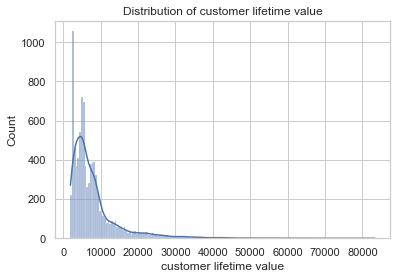

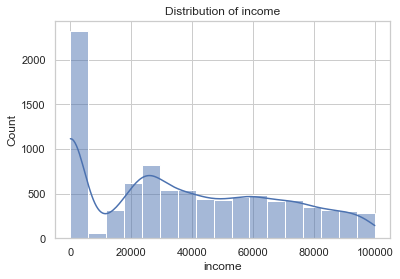

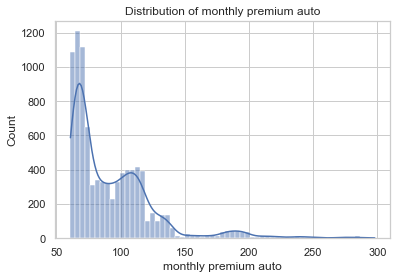

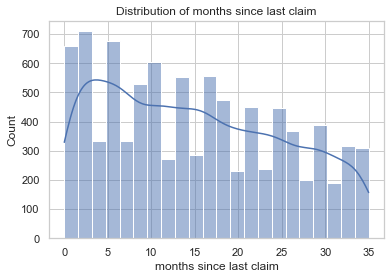

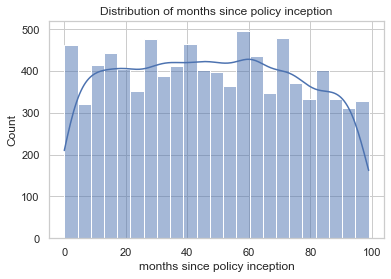

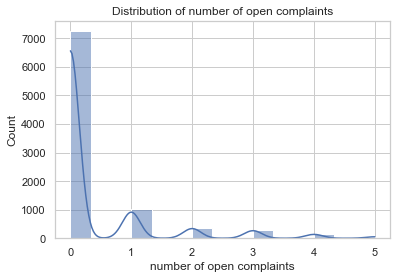

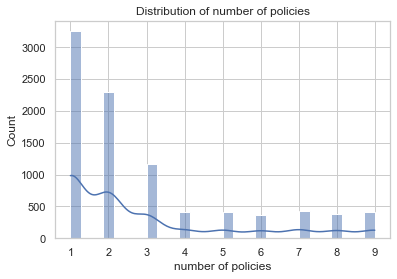

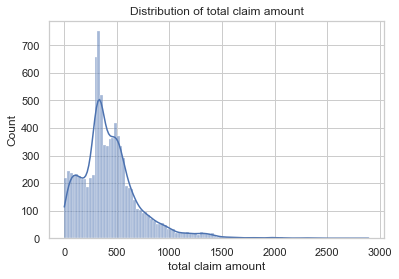

In [17]:
sns.set(style="whitegrid")
for column in df_n:
    plt.figure(figsize=(6, 4))
    sns.histplot(data=df_n, x=column, kde=True)
    plt.title(f'Distribution of {column}')
    plt.show()

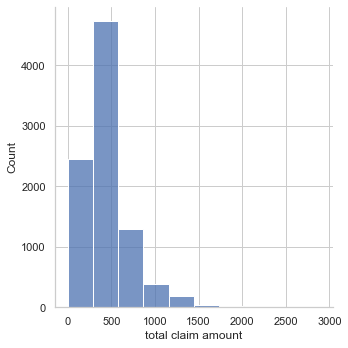

In [19]:
sns.displot(df_n["total claim amount"], bins=10)
plt.show()

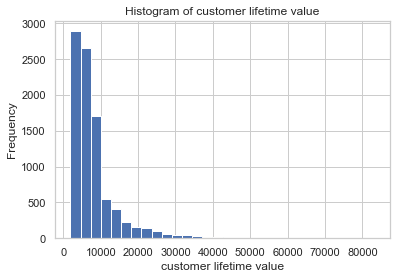

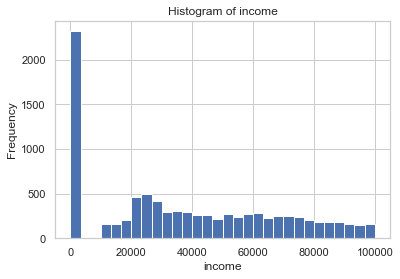

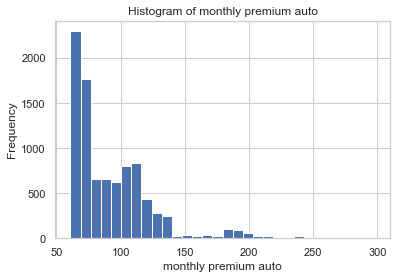

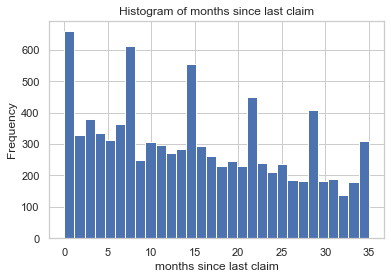

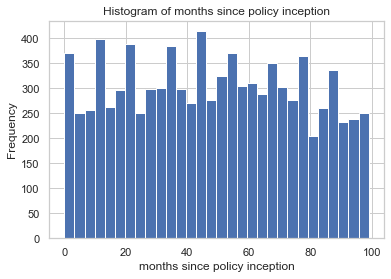

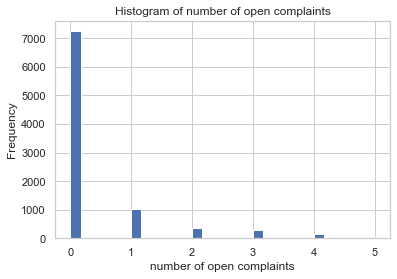

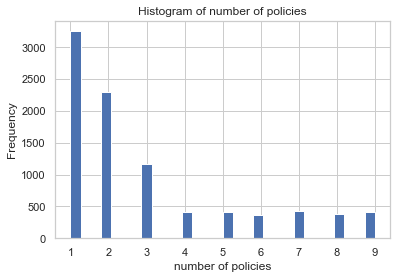

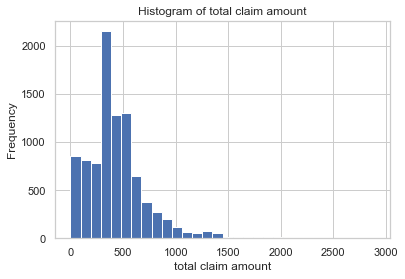

In [20]:
# using matplotlib plotting the df_n
for column in df_n:
    plt.figure(figsize=(6, 4))
    plt.hist(df_n[column], bins=30)
    plt.xlabel(column)
    plt.ylabel('Frequency')
    plt.title(f'Histogram of {column}')
    plt.show()

In [18]:
# collinearity
correlations_matrix = df.corr()
correlations_matrix

,customer lifetime value,income,monthly premium auto,months since last claim,months since policy inception,number of open complaints,number of policies,total claim amount
customer lifetime value,1.000000,0.024366,0.396262,0.011517,0.009418,-0.036343,0.021955,0.226451
income,0.024366,1.000000,-0.016665,-0.026715,-0.000875,0.006408,-0.008656,-0.355254
monthly premium auto,0.396262,-0.016665,1.000000,0.005026,0.020257,-0.013122,-0.011233,0.632017
months since last claim,0.011517,-0.026715,0.005026,1.000000,-0.042959,0.005354,0.009136,0.007563
months since policy inception,0.009418,-0.000875,0.020257,-0.042959,1.000000,-0.001158,-0.013333,0.003335
number of open complaints,-0.036343,0.006408,-0.013122,0.005354,-0.001158,1.000000,0.001498,-0.014241
number of policies,0.021955,-0.008656,-0.011233,0.009136,-0.013333,0.001498,1.000000,-0.002354
total claim amount,0.226451,-0.355254,0.632017,0.007563,0.003335,-0.014241,-0.002354,1.000000


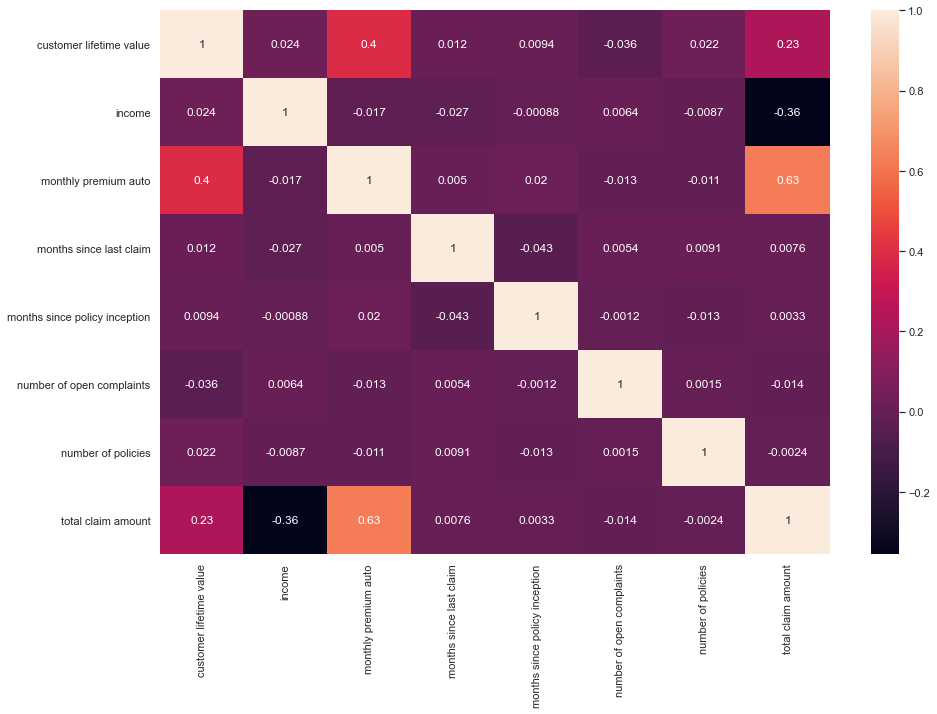

In [21]:
plt.subplots(figsize=(15,10))
sns.heatmap(correlations_matrix, annot=True)
plt.show()

#  Processing Data

In [22]:
# Dealing with outliers.

df_n.head()

,customer lifetime value,income,monthly premium auto,months since last claim,months since policy inception,number of open complaints,number of policies,total claim amount
0,2763.519279,56274,69,32,5,0,1,384.811147
1,6979.535903,0,94,13,42,0,8,1131.464935
2,12887.431650,48767,108,18,38,0,2,566.472247
3,7645.861827,0,106,18,65,0,7,529.881344
4,2813.692575,43836,73,12,44,0,1,138.130879


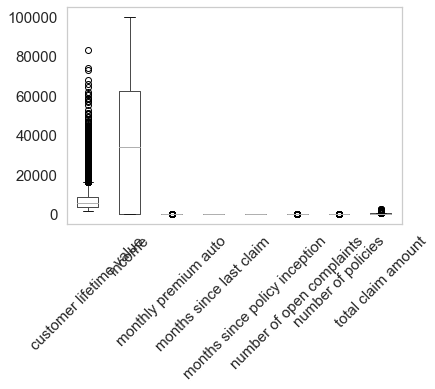

In [23]:
# using box plot the outliers can be found easily and in here customer lifetime value has higher outlier so it should be removed
boxplot = df_n.boxplot(grid=False, rot=45, fontsize=15) 

In [24]:
df_n.shape

(9134, 8)

In [25]:

iqr = np.percentile(df_n['customer lifetime value'],75) - np.percentile(df_n['customer lifetime value'],25)
upper_limit = np.percentile(df_n['customer lifetime value'],75) + 1.5*iqr
lower_limit = np.percentile(df_n['customer lifetime value'],25) - 1.5*iqr


In [26]:
upper_limit

16414.039911750002

In [27]:
lower_limit

-3457.6210762500014

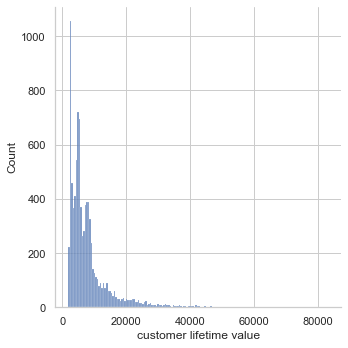

In [28]:
data1 = df_n[(df_n['customer lifetime value']>lower_limit) & (df_n['customer lifetime value']<upper_limit)].copy()
sns.displot(df_n['customer lifetime value'])
plt.show()

C:\Users\ABHIRAM\anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


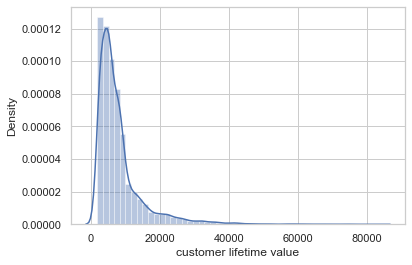

In [30]:
data2 = df_n[(df_n['customer lifetime value']>np.percentile(df_n['customer lifetime value'],25) - 3*iqr) & (df_n['customer lifetime value']<np.percentile(df_n['customer lifetime value'],75) + 3*iqr)].copy()
sns.distplot(df_n['customer lifetime value'])
plt.show()

In [31]:
data1.shape

(8317, 8)

In [33]:
data2.shape

(8767, 8)

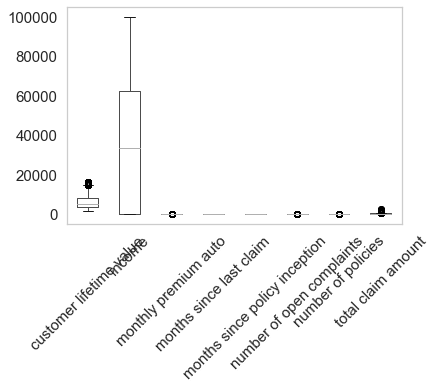

In [34]:
boxplot = data1.boxplot(grid=False, rot=45, fontsize=15) 

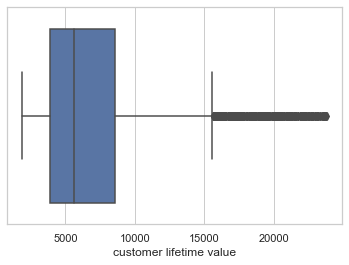

In [35]:

sns.boxplot(x=data2['customer lifetime value'])
plt.show()

In [36]:
# here the outliers are removed from customer lifetime value

In [37]:
# data represents the data which has no outliers
data = df_n[(df_n['customer lifetime value']>lower_limit) & (df_n['customer lifetime value']<upper_limit)]
data

,customer lifetime value,income,monthly premium auto,months since last claim,months since policy inception,number of open complaints,number of policies,total claim amount
0,2763.519279,56274,69,32,5,0,1,384.811147
1,6979.535903,0,94,13,42,0,8,1131.464935
2,12887.431650,48767,108,18,38,0,2,566.472247
3,7645.861827,0,106,18,65,0,7,529.881344
4,2813.692575,43836,73,12,44,0,1,138.130879
...,...,...,...,...,...,...,...,...
9128,4100.398533,47761,104,16,58,0,1,541.282007
9130,3096.511217,21604,79,14,28,0,1,379.200000
9131,8163.890428,0,85,9,37,3,2,790.784983
9132,7524.442436,21941,96,34,3,0,3,691.200000


In [38]:
data['customer lifetime value'].describe()

count     8317.000000
mean      6279.177892
std       3240.426385
min       1898.007675
25%       3746.751625
50%       5470.060561
75%       8162.617053
max      16407.664610
Name: customer lifetime value, dtype: float64

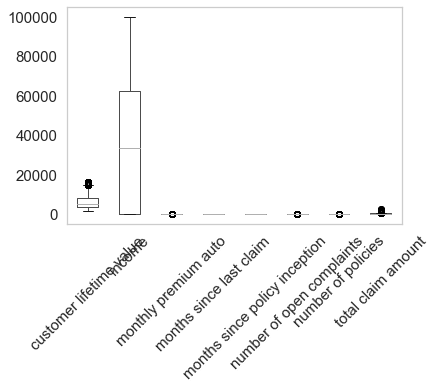

In [39]:
boxplot = data.boxplot(grid=False, rot=45, fontsize=15) 

In [41]:
data.shape

(8317, 8)

## Normalization

In [46]:
#separate the features from the labels
y = df['total claim amount']
X = df.drop(['total claim amount'], axis=1)

In [47]:
#categorical features and numerical ones are going to be treated differently
X_num = X.select_dtypes(include = np.number)
X_cat = X.select_dtypes(include = object)

In [48]:
X_num.describe().T

,count,mean,std,min,25%,50%,75%,max
customer lifetime value,9134.0,8004.940475,6870.967608,1898.007675,3994.251794,5780.182197,8962.167041,83325.38119
income,9134.0,37657.380009,30379.904734,0.000000,0.000000,33889.500000,62320.000000,99981.00000
monthly premium auto,9134.0,93.219291,34.407967,61.000000,68.000000,83.000000,109.000000,298.00000
months since last claim,9134.0,15.097000,10.073257,0.000000,6.000000,14.000000,23.000000,35.00000
months since policy inception,9134.0,48.064594,27.905991,0.000000,24.000000,48.000000,71.000000,99.00000
number of open complaints,9134.0,0.384388,0.910384,0.000000,0.000000,0.000000,0.000000,5.00000
number of policies,9134.0,2.966170,2.390182,1.000000,1.000000,2.000000,4.000000,9.00000


In [49]:
from sklearn.preprocessing import MinMaxScaler
MinMaxtransformer = MinMaxScaler().fit(X_num)
X_normalized = MinMaxtransformer.transform(X_num)
print(type(X_normalized))
X_normalized = pd.DataFrame(X_normalized,columns=X_num.columns)
display(X_normalized.head())
print(type(X_normalized))

<class 'numpy.ndarray'>


,customer lifetime value,income,monthly premium auto,months since last claim,months since policy inception,number of open complaints,number of policies
0,0.010629,0.562847,0.033755,0.914286,0.050505,0.0,0.000
1,0.062406,0.000000,0.139241,0.371429,0.424242,0.0,0.875
2,0.134960,0.487763,0.198312,0.514286,0.383838,0.0,0.125
3,0.070589,0.000000,0.189873,0.514286,0.656566,0.0,0.750
4,0.011245,0.438443,0.050633,0.342857,0.444444,0.0,0.000


<class 'pandas.core.frame.DataFrame'>


In [50]:
X_normalized.describe().T

,count,mean,std,min,25%,50%,75%,max
customer lifetime value,9134.0,0.074999,0.084382,0.0,0.025744,0.047677,0.086754,1.0
income,9134.0,0.376645,0.303857,0.0,0.000000,0.338959,0.623318,1.0
monthly premium auto,9134.0,0.135946,0.145181,0.0,0.029536,0.092827,0.202532,1.0
months since last claim,9134.0,0.431343,0.287807,0.0,0.171429,0.400000,0.657143,1.0
months since policy inception,9134.0,0.485501,0.281879,0.0,0.242424,0.484848,0.717172,1.0
number of open complaints,9134.0,0.076878,0.182077,0.0,0.000000,0.000000,0.000000,1.0
number of policies,9134.0,0.245771,0.298773,0.0,0.000000,0.125000,0.375000,1.0


# One Hot Encoding (categorical).


In [52]:
X_cat = df.select_dtypes(include = object)

In [53]:
#one hot encoding is a way to turn categorical variables into multiple numerical columns
from sklearn.preprocessing import OneHotEncoder
# encoder = OneHotEncoder().fit(X_cat)
encoder = OneHotEncoder(drop='first').fit(X_cat)
print(encoder.categories_)
encoded = encoder.transform(X_cat).toarray()
print(encoded)
# #onehot_encoded = pd.DataFrame(encoded,columns=['Female', 'Male','U'])
# onehot_encoded = pd.DataFrame(encoded,columns=['Male', 'U'])
# onehot_encoded.head(20)

[array(['AA10041', 'AA11235', 'AA16582', ..., 'ZZ89380', 'ZZ91716',
       'ZZ97035'], dtype=object), array(['Arizona', 'California', 'Nevada', 'Oregon', 'Washington'],
      dtype=object), array(['No', 'Yes'], dtype=object), array(['Basic', 'Extended', 'Premium'], dtype=object), array(['Bachelor', 'College', 'Doctor', 'High School or Below', 'Master'],
      dtype=object), array(['1/1/11', '1/10/11', '1/11/11', '1/12/11', '1/13/11', '1/14/11',
       '1/15/11', '1/16/11', '1/17/11', '1/18/11', '1/19/11', '1/2/11',
       '1/20/11', '1/21/11', '1/22/11', '1/23/11', '1/24/11', '1/25/11',
       '1/26/11', '1/27/11', '1/28/11', '1/29/11', '1/3/11', '1/30/11',
       '1/31/11', '1/4/11', '1/5/11', '1/6/11', '1/7/11', '1/8/11',
       '1/9/11', '2/1/11', '2/10/11', '2/11/11', '2/12/11', '2/13/11',
       '2/14/11', '2/15/11', '2/16/11', '2/17/11', '2/18/11', '2/19/11',
       '2/2/11', '2/20/11', '2/21/11', '2/22/11', '2/23/11', '2/24/11',
       '2/25/11', '2/26/11', '2/27/11', '2/28/11',

In [54]:
encoder = OneHotEncoder(drop='first').fit(X_cat)

cols = encoder.get_feature_names_out(input_features=X_cat.columns)

X_cat_encode = pd.DataFrame(encoder.transform(X_cat).toarray(),columns=cols)

X_cat_encode.head()

,customer_AA11235,customer_AA16582,customer_AA30683,customer_AA34092,customer_AA35519,customer_AA56476,customer_AA69265,customer_AA71604,customer_AA93585,customer_AB13432,...,sales channel_Branch,sales channel_Call Center,sales channel_Web,vehicle class_Luxury Car,vehicle class_Luxury SUV,vehicle class_SUV,vehicle class_Sports Car,vehicle class_Two-Door Car,vehicle size_Medsize,vehicle size_Small
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0


In [55]:
# concatinating the normalised and encoded data
X = pd.concat([X_normalized,X_cat_encode], axis=1)  # np.concatenate()
X

,customer lifetime value,income,monthly premium auto,months since last claim,months since policy inception,number of open complaints,number of policies,customer_AA11235,customer_AA16582,customer_AA30683,...,sales channel_Branch,sales channel_Call Center,sales channel_Web,vehicle class_Luxury Car,vehicle class_Luxury SUV,vehicle class_SUV,vehicle class_Sports Car,vehicle class_Two-Door Car,vehicle size_Medsize,vehicle size_Small
0,0.010629,0.562847,0.033755,0.914286,0.050505,0.0,0.000,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0
1,0.062406,0.000000,0.139241,0.371429,0.424242,0.0,0.875,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
2,0.134960,0.487763,0.198312,0.514286,0.383838,0.0,0.125,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0
3,0.070589,0.000000,0.189873,0.514286,0.656566,0.0,0.750,0.0,0.0,0.0,...,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0
4,0.011245,0.438443,0.050633,0.342857,0.444444,0.0,0.000,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9129,0.264137,0.719547,0.050633,0.514286,0.898990,0.0,0.125,0.0,0.0,0.0,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
9130,0.014719,0.216081,0.075949,0.400000,0.282828,0.0,0.000,0.0,0.0,0.0,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
9131,0.076951,0.000000,0.101266,0.257143,0.373737,0.6,0.125,0.0,0.0,0.0,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
9132,0.069098,0.219452,0.147679,0.971429,0.030303,0.0,0.250,0.0,0.0,0.0,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


# Splitting into train set and test set.

In [56]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [57]:
print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

(7307, 9241)
(1827, 9241)
(7307,)
(1827,)


# Modeling

In [58]:
# Applying linear regression model
lm = linear_model.LinearRegression()
lm.fit(X_train,y_train)

LinearRegression()

# Model Validation

In [59]:
from sklearn.metrics import mean_absolute_error, r2_score

In [60]:
# r2 score
predictions = lm.predict(X_train)
r2_score(y_train, predictions)

1.0

In [61]:
from sklearn.metrics import mean_squared_error

# RMSE
rmse = np.sqrt(mean_squared_error(y_train,predictions))
rmse

2.26894176114912e-12

In [62]:
#MAE 
mae = mean_absolute_error(y_train, predictions)
print(mae)

1.7823937663611943e-12


In [63]:
MSE = mean_squared_error(y_train,predictions)
MSE.round(2)

0.0

# Reporting